In [15]:
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import ks_2samp
import seaborn as sns

In [3]:
# load model
with open('./models/best_model_funeTune.dat', 'rb') as f:
    model = pickle.load(f)

In [4]:
# Load training and testing data
X_test = pd.read_csv('./dummy_data/X_test.csv',index_col=0).drop('SoldTime',axis=1)
y_test = pd.read_csv('./dummy_data/y_test.csv',index_col=0,header=None)

In [5]:
X_test.shape,y_test.shape

((438, 318), (438, 1))

In [7]:
# predict testing data
predicts = model.predict(X_test)

In [8]:
# r-square explained 87% of variance
r2_score(predicts,y_test)

0.8671206964706982

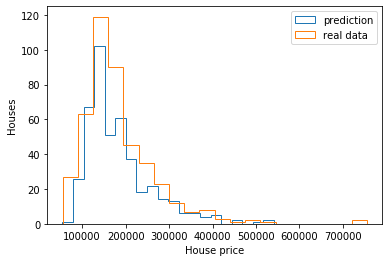

In [9]:
# plot distribution of predicted price and real price
plt.hist(predicts, bins=20, histtype='step',label='prediction')
plt.hist(y_test.values[:,0],bins=20, histtype='step',label='real data')
plt.xlabel('House price')
plt.ylabel('Houses')
plt.legend()

In [12]:
# check residue
price_dif = pd.DataFrame({'dif': predicts-y_test.values[:,0]})
# total price difference between predicted price and real data. 

sum(price_dif.dif)

-115843.39453125

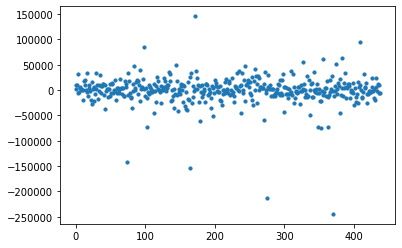

In [13]:
# plot residue for model
plt.scatter(range(price_dif.shape[0]), price_dif.dif.values,s=10)

In [14]:
# t-test to check whether prediction is statistically different from real data
ttest_ind(predicts,y_test.values[:,0],equal_var = True)

Ttest_indResult(statistic=-0.04823727482241849, pvalue=0.9615381640325351)

In [17]:
# two-sample Kolmogorov-Smirnov test in case the distribution is not normal
ks_2samp(predicts,y_test.values[:,0])

Ks_2sampResult(statistic=0.04794520547945205, pvalue=0.6959369347701858)

In [18]:
over_pricing = price_dif.loc[price_dif.dif < 0] # real price is higher than predicted price
under_pricing = price_dif.loc[price_dif.dif > 0] # real price is lower than predicted price

In [19]:
over_pricing.shape[0],under_pricing.shape[0]

(205, 233)

In [20]:
# average price difference in over-price and under-price houses
sum(over_pricing.dif)/over_pricing.shape[0], sum(under_pricing.dif)/under_pricing.shape[0]

(-17095.804744664634, 14544.191322424893)

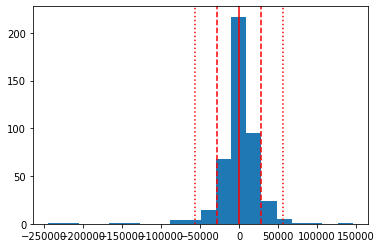

In [21]:
# histogram to check residue
mean = price_dif.dif.mean()
sd = price_dif.dif.std()

plt.hist(price_dif.dif, bins=20)
plt.axvline(mean,color='r',linestyle = '-')
plt.axvline(mean-sd,color='r',linestyle = '--')
plt.axvline(mean+sd,color='r',linestyle = '--')
plt.axvline(mean-2*sd,color='r',linestyle = ':')
plt.axvline(mean+2*sd,color='r',linestyle = ':')

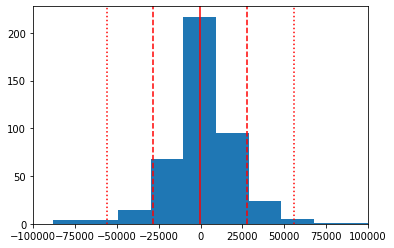

In [22]:
# chop off extream values
plt.hist(price_dif.dif, bins=20)
plt.xlim(-100000,100000)
plt.axvline(mean,color='r',linestyle = '-')
plt.axvline(mean-sd,color='r',linestyle = '--')
plt.axvline(mean+sd,color='r',linestyle = '--')
plt.axvline(mean-2*sd,color='r',linestyle = ':')
plt.axvline(mean+2*sd,color='r',linestyle = ':')

In [23]:
# 95% confidence interval
price_dif.dif.quantile(0.025),price_dif.dif.quantile(0.975)

(-49663.3421875, 39272.62031249998)

In [24]:
# 80% confidence interval
price_dif.dif.quantile(0.1),price_dif.dif.quantile(0.9)

(-21901.178125, 23501.995312500007)